In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../DATA/mushrooms.csv")

In [4]:
X = df.drop('class', axis=1)

In [20]:
# X.isnull().sum()

In [21]:
# Так как все "переменные" указаны в буквах, то нам нужны dummies

In [5]:
X = pd.get_dummies(X, drop_first=True)

In [6]:
y = df['class']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
param_grid = {'n_estimators': [50, 100],
             'learning_rate': [0.1, 0.05, 0.2],
             'max_depth': [3, 4, 5]}

In [12]:
gb_model = GradientBoostingClassifier()

In [13]:
grid = GridSearchCV(gb_model, param_grid)

In [14]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [15]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [16]:
predictions = grid.predict(X_test)

In [17]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [18]:
grid.best_estimator_

GradientBoostingClassifier()

In [19]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [20]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [22]:
#grid.best_estimator_.feature_importances_

In [23]:
feat_imp = grid.best_estimator_.feature_importances_

In [24]:
imp_feats = pd.DataFrame(data=feat_imp, index=X.columns, columns=['Importance'])

In [25]:
imp_feats

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,4.623079e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,6.739204e-17
...,...
habitat_l,0.000000e+00
habitat_m,1.746927e-16
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [27]:
imp_feats = imp_feats[imp_feats['Importance'] > 0.0005]

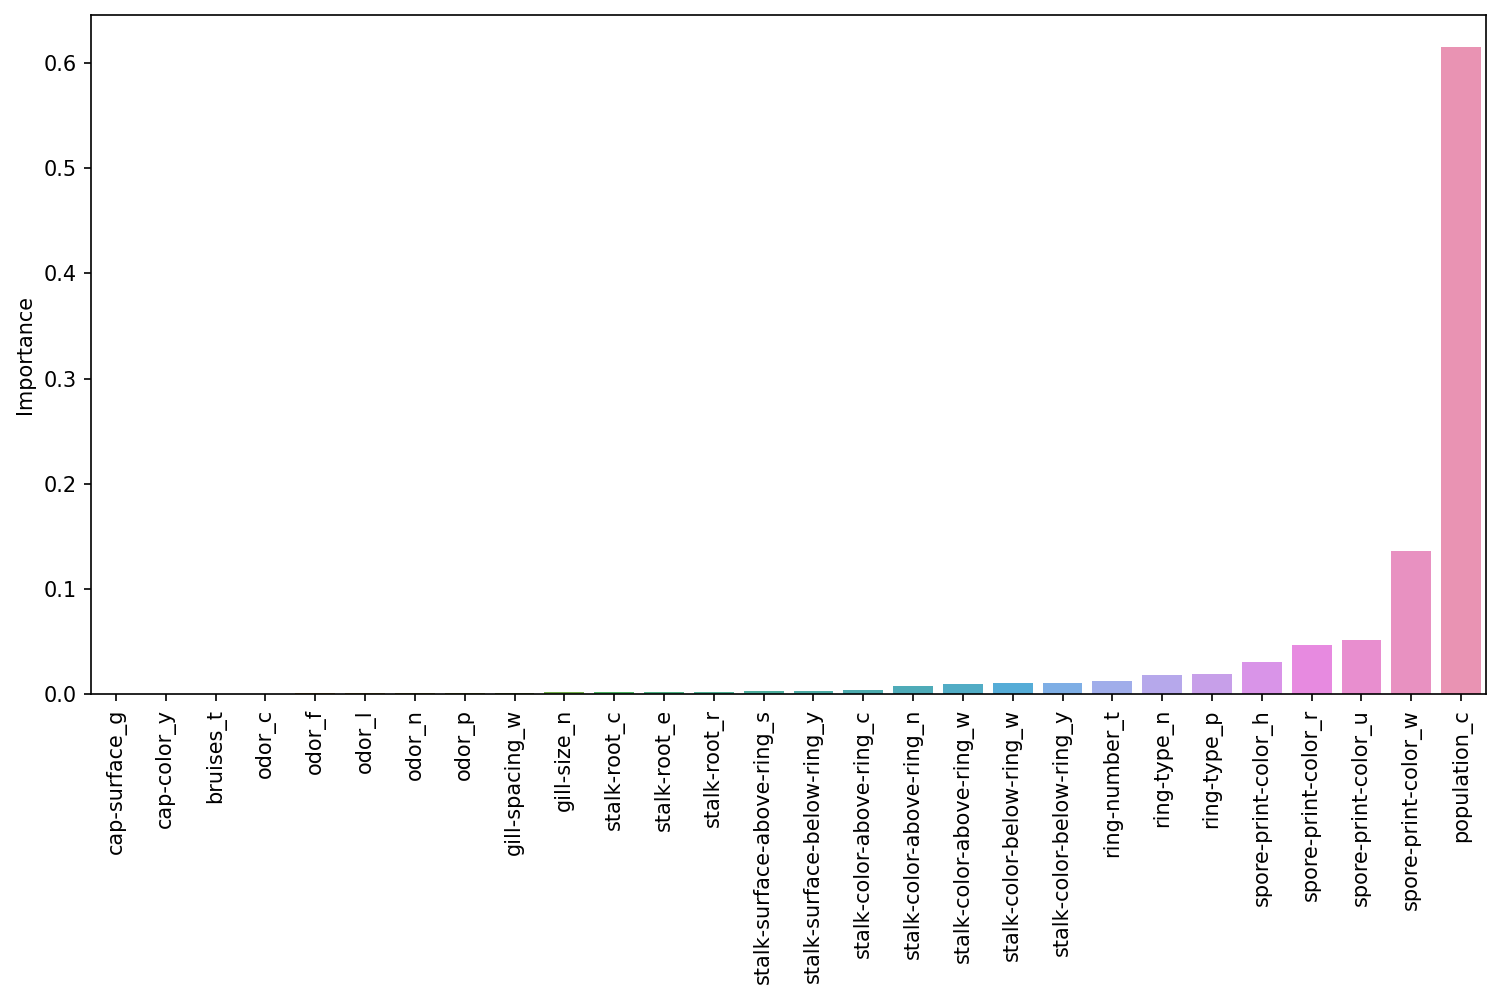

In [35]:
plt.figure(figsize=(12,6), dpi=150)

sns.barplot(data=imp_feats.sort_values('Importance'),
           x=imp_feats.index,
           y='Importance')
plt.xticks(rotation=90);